# Module 11 Challenge

## Deliverable 2: Scrape and Analyze  Mars Weather Data

In [1]:
# # Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#With this i open a chrome window
browser = Browser('chrome')

## Step 1: Visit the Website

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

## Step 2: Scrape the table

In [4]:
# Save the HTML from the browser
html = browser.html
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html,'html.parser')

In [5]:
#with this, i extract the table from the website
table = soup.find('table', class_='table')

In [6]:
#Here i create to list to save the name of the columns (columns_table) and the information of the weather (mars_weather_data)
mars_weather_data= []
columns_table= []
columns=table.find_all('th')
rows=table.find_all('tr',class_='data-row')

# with this for, i obtain the name of the columns
for value in columns:
    columns_table.append(value.text)

#with this for, i get the information of the weather.
for row in rows:
    i=0
    data={}
    x=row.find_all('td')
    for value in x:
        data[columns_table[i]]=value.text
        i=i+1

    mars_weather_data.append(data)

#here, i save the information i a dataframe 
mars_weather_data=pd.DataFrame(mars_weather_data)
mars_weather_data.head(5)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## Step 4: Prepare Data for Analysis

In [7]:
mars_weather_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
#here, i change the data type of each column
mars_weather_data["terrestrial_date"]=mars_weather_data["terrestrial_date"].astype("datetime64[ns]")
mars_weather_data["sol"]=mars_weather_data["sol"].astype("int64")
mars_weather_data["ls"]=mars_weather_data["ls"].astype("int64")
mars_weather_data["month"]=mars_weather_data["month"].astype("int64")
mars_weather_data["min_temp"]=mars_weather_data["min_temp"].astype("float64")
mars_weather_data["pressure"]=mars_weather_data["pressure"].astype("float64")



In [9]:
#i comfirm the changes of the data types
mars_weather_data.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

## Step 5: Analyze the Data

In [10]:
# 1. How many months are there on Mars?
month=mars_weather_data.groupby(["month"])
months_mars= month["id"].count()
months_mars

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
mars_weather_data["id"].count()

1867

In [13]:
# 3. What is the average low temperature by month?
min_temp=month["min_temp"].mean()
min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

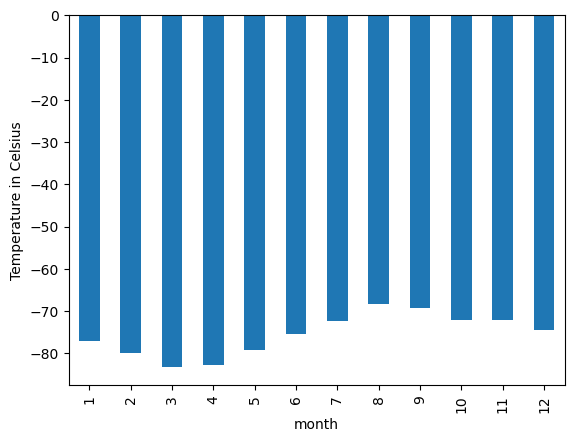

In [14]:
# Plot the average temperature by month
temp_chart=min_temp.plot(kind="bar")
plt.ylabel("Temperature in Celsius")


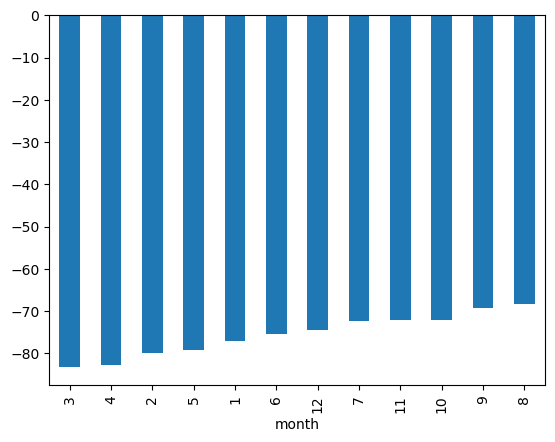

In [15]:
# Identify the coldest and hottest months in Curiosity's location

sort_min_temp=min_temp.sort_values()
sort_temp_chart=sort_min_temp.plot(kind="bar")

## Which month, on average, has the lowest temperature? The highest?

### As we can see, the thrid month is the coldest and the eighth month is the warmest of mars.

In [16]:
# 4. Average pressure by Martian month
pressure=month["pressure"].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

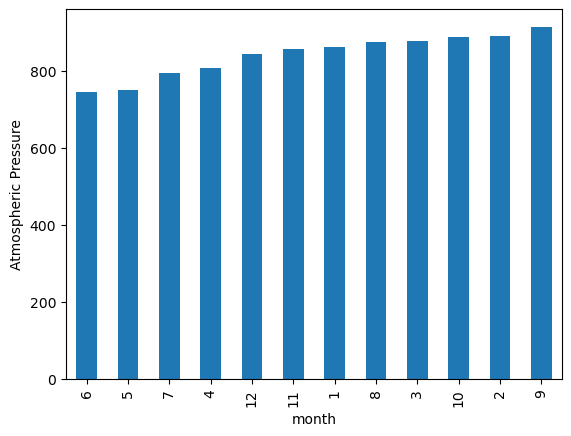

In [17]:
# Plot the average pressure by month
sort_pressure=pressure.sort_values()
pressure_chart=sort_pressure.plot(kind="bar")
plt.ylabel("Atmospheric Pressure")

## Which month, on average, has the lowest atmospheric pressure? The highest? 

### if we see this graph, we can see that sixth month have the lower atmospheric pressure and the nineth month have the highest atmospheric pressure. 

Text(0, 0.5, 'Minimum Temperature')

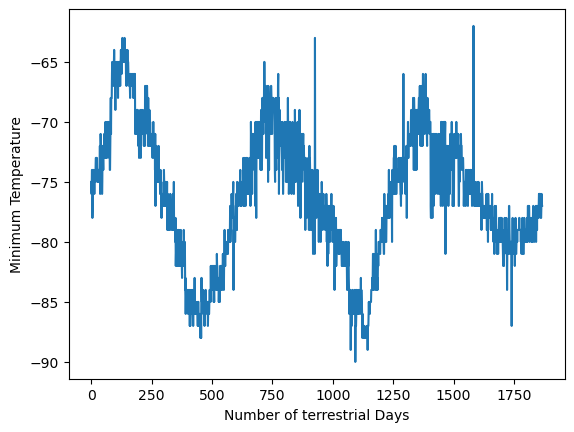

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?
days_terrestrial=plt.plot(mars_weather_data["min_temp"])
plt.xlabel("Number of terrestrial Days")
plt.ylabel("Minimum Temperature")

## How many terrestrial days exist in a Martian year? A visual estimate within 25% was made

### The distance between peak is 1425-750, or 675 days

In [19]:
# Write the data to a CSV
mars_weather_data.to_csv("mars-weather.csv",index_label="id")

In [20]:
#close the chrome window
browser.quit()